In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.layers import Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
def trainingWindows(df, ref_day=1, predict_day=1):
    X_train, Y_train = [], []
    for i in range(df.shape[0] - predict_day - ref_day):
        X_train.append(np.array(df.iloc[i:i + ref_day]))
        Y_train.append(np.array(df.iloc[i + ref_day:i + ref_day + predict_day]['open']))
    return np.array(X_train), np.array(Y_train)

In [3]:
def modelBuilding(shape):
    model = Sequential()
    model.add(LSTM(units = 256, kernel_initializer = 'glorot_normal', return_sequences = True, input_shape = (shape[1], shape[2])))

    model.add(LSTM(units = 256, kernel_initializer = 'glorot_normal', return_sequences = True))
    model.add(TimeDistributed(Dense(1)))
    model.add(Flatten())
    model.add(Dense(5,activation='linear'))
    model.add(Dense(1,activation='linear'))
    model.compile(loss="mean_absolute_error", optimizer="adam",metrics=['mean_absolute_error'])
    
    model.summary()
    
    return model

In [4]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))

In [5]:
column_name = ['open', 'high', 'low', 'close']
training = pd.read_csv("training_data.csv", header=None, names=column_name)
testing = pd.read_csv("testing_data.csv", header=None, names=column_name)
training

,open,high,low,close
0,186.73,188.71,186.00,186.30
1,185.57,186.33,184.94,185.54
2,184.81,185.03,183.10,184.66
3,184.39,184.48,182.31,182.54
4,182.20,182.27,180.27,181.59
...,...,...,...,...
1483,151.95,152.20,151.33,151.84
1484,152.06,152.49,151.62,151.98
1485,152.35,152.93,151.70,152.47
1486,152.81,153.61,152.17,153.55


In [6]:
trainingData = training.copy();
trainingData['mid'] = pd.DataFrame((trainingData['high'] + trainingData['low']) / 2)
trainingData.dropna()
# normailize
for col in trainingData.columns:
    trainingData[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(trainingData[col])))
X_train, Y_train = trainingWindows(trainingData, 6)
X_train.shape

(1481, 6, 5)

In [7]:
# model building
model = modelBuilding(X_train.shape)
callback = EarlyStopping(monitor="mean_absolute_error", patience=10, verbose=1, mode="auto")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 256)            268288    
                                                                 
 lstm_1 (LSTM)               (None, 6, 256)            525312    
                                                                 
 time_distributed (TimeDistr  (None, 6, 1)             257       
 ibuted)                                                         
                                                                 
 flatten (Flatten)           (None, 6)                 0         
                                                                 
 dense_1 (Dense)             (None, 5)                 35        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                        

In [8]:
# model training
model.fit(X_train, Y_train, epochs=300, batch_size=32, validation_split=0.1, callbacks=[callback],shuffle=True)
# model.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/300
42/42 [==============================] - 4s 17ms/step - loss: 0.1129 - mean_absolute_error: 0.1129 - val_loss: 0.0303 - val_mean_absolute_error: 0.0303
Epoch 2/300
42/42 [==============================] - 0s 6ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - val_loss: 0.0231 - val_mean_absolute_error: 0.0231
Epoch 3/300
42/42 [==============================] - 0s 6ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - val_loss: 0.0174 - val_mean_absolute_error: 0.0174
Epoch 4/300
42/42 [==============================] - 0s 6ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - val_loss: 0.0155 - val_mean_absolute_error: 0.0155
Epoch 5/300
42/42 [==============================] - 0s 6ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - val_loss: 0.0173 - val_mean_absolute_error: 0.0173
Epoch 6/300
42/42 [==============================] - 0s 6ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - val_loss: 0.0136 - val_mean_absolute_error: 0.0136
Epoch 7/300
42/42 [==

42/42 [==============================] - 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - val_loss: 0.0187 - val_mean_absolute_error: 0.0187
Epoch 52/300
42/42 [==============================] - 0s 7ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - val_loss: 0.0071 - val_mean_absolute_error: 0.0071
Epoch 53/300
42/42 [==============================] - 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096
Epoch 54/300
42/42 [==============================] - 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097
Epoch 55/300
42/42 [==============================] - 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - val_loss: 0.0077 - val_mean_absolute_error: 0.0077
Epoch 56/300
42/42 [==============================] - 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - val_loss: 0.0071 - val_mean_absolute_error: 0.0071
Epoch 57/300
42/42 [=========

42/42 [==============================] - 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096
Epoch 102/300
42/42 [==============================] - 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - val_loss: 0.0075 - val_mean_absolute_error: 0.0075
Epoch 103/300
42/42 [==============================] - 0s 7ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - val_loss: 0.0068 - val_mean_absolute_error: 0.0068
Epoch 104/300
42/42 [==============================] - 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - val_loss: 0.0090 - val_mean_absolute_error: 0.0090
Epoch 105/300
42/42 [==============================] - 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065
Epoch 106/300
42/42 [==============================] - 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - val_loss: 0.0149 - val_mean_absolute_error: 0.0149
Epoch 00106: early stopp

In [9]:
def makingAction(msg, State):
    return {
        'BUY': 'HOLD' if State == 1 else 'BUY',
        'HOLD': 'HOLD',
        'SELL': 'HOLD' if State == -1 else 'SELL',
    }[msg]

def getAction(action):
    return {
        'BUY': 1,
        'HOLD': 0,
        'SELL': -1
    }[action]

In [10]:
def decisionMaking(Price, State, previousAct, openWindow, D1):
    action = 0
    
    if(previousAct != 0):
        Price = (float)(openWindow[-1:])
        
    monthLine = sum(openWindow)/20
    weekLine = sum(openWindow[-6:-1])/5
#     print('monthLine:',monthLine,',weekLine:',weekLine)
    print((float)(openWindow[-1:]))
    y = (float)(openWindow[-2:-1])
    t = (float)(openWindow[-1:])
    
    if(State == 0):
        if(D1 > t):
            action = getAction(makingAction('BUY', State))
        elif(t > D1):
            action = getAction(makingAction('SELL', State))
    else:
        if(State == 1):
#             if(Price < D1):
#                 action = getAction(makingAction('HOLD', State))
#             elif(D1 < Price):
#                 action = getAction(makingAction('SELL', State))

            if(t < D1):
                action = getAction(makingAction('HOLD', State))
            elif(D1 < t):
                action = getAction(makingAction('SELL', State))
        elif(State == -1):
            if(t < D1):
                action = getAction(makingAction('HOLD', State))
            elif(D1 < t):
                action = getAction(makingAction('BUY', State)) 
            
    State += action
    previousAct = action
    return action, Price, State, previousAct, monthLine, weekLine

In [11]:
total = pd.concat((training, testing), axis=0)
total['mid'] = pd.DataFrame((total['high'] + total['low']) / 2)
total.reset_index(inplace=True, drop=True)
testing

,open,high,low,close
0,154.40,155.02,152.91,154.76
1,155.96,156.80,155.07,156.46
2,156.45,156.74,154.68,155.35
3,154.10,156.22,154.09,154.10
4,153.59,154.45,153.26,153.57
5,154.81,155.03,153.55,154.81
6,155.46,155.89,154.57,155.41
7,156.74,157.85,155.16,156.74
8,156.60,156.73,153.89,153.91
9,154.60,155.11,153.70,154.00


In [12]:
locat = len(training)
result = []
MLs = []
WLs = []
actions = []
Price = 0.0
State = 0
previousAct = 0
for i in range(locat, locat + len(testing) -1):
    data = total[0:i].copy()
    openWindow = data['open'][-20:].copy()
    for col in data.columns:
        data[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(data[col])))
    predictData = [data[i-6:i]]
    prediction = min_max_scaler.inverse_transform(model.predict(np.array(predictData)))
    D1 = prediction[0][0]
    result.append(D1)
    action, p, s, pa, ML, WL = decisionMaking(Price, State, previousAct, openWindow, D1)
    actions.append(action)
    MLs.append(ML)
    WLs.append(WL)
    Price = p
    State = s
    previousAct = pa 
print(actions)

153.65
154.4
155.96
156.45
154.1
153.59
154.81
155.46
156.74
156.6
154.6
153.61
153.59
154.05
153.65
153.17
151.82
152.51
152.95
[1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0]


In [13]:
# evaluation
mean_squared_error(testing['open'][:-1], result, squared = False)

1.2231127447409342

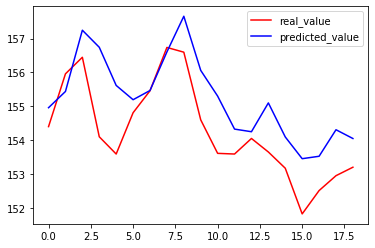

In [14]:
# draw
index = np.array([i for i in range(len(result))])
plt.plot(index, np.array(testing['open'][:-1]), color='red', label='real_value')
plt.plot(index, np.array(result), color='blue', label='predicted_value')
plt.legend()
plt.show()